
<a id='chap-tparbresdecision'></a>

# Travaux pratiques - Arbres de décision

L’objectif de cette séance de travaux pratiques est d’exposer la mise en œuvre des arbres de décision pour les problèmes de classification et de régression. Ce document reprend librement certains exemples montrés dans l’excellente documentation de scikit-learn.

Références externes utiles :

> - [Documentation NumPy](https://docs.scipy.org/doc/numpy/user/index.html)  
- [Documentation SciPy](https://docs.scipy.org/doc/scipy/reference/)  
- [Documentation MatPlotLib](http://matplotlib.org/)  
- [Site scikit-learn](http://scikit-learn.org/stable/index.html)  
- [Site langage python](https://www.python.org)  

## Arbres de décision

Les arbres de décision sont des méthodes d’apprentissage non paramétriques utilisées pour des problèmes de classification et de régression. L’objectif est de créer un modèle qui prédit les valeurs de la variable cible, en se basant sur un ensemble de séquences de règles de décision déduites à partir des données d’apprentissage.
L’arbre approxime donc la cible par une succession de règles `if-then-else`.
Ce paradigme s’applique aussi bien à des données catégorielles qu’à des données numériques.
Plus l’arbre généré est complexe, mieux le modèle « explique » les donnés d’apprentissage mais plus le risque de sur-apprentissage (*over-fitting*) est élevé.

Les arbres de décision ont plusieurs **avantages** qui les rendent intéressants dans des contextes où il est utile de comprendre la séquence de décisions prise par le modèle :

- Ils sont simples à comprendre et à visualiser.  
- Ils nécessitent peu de préparation des données (normalisation, etc.).  
- Le coût d’utilisation des arbres est logarithmique.  
- Ils sont capables d’utiliser des données catégorielles et numériques.  
- Ils sont capables de traiter des problèmes multi-classe.  
- Modèle en boîte blanche : le résultat est facile à conceptualiser et à visualiser.  


Ces modèles présentent néanmoins deux **désavantages** majeurs :

- Sur-apprentissage :  parfois les arbres générés sont trop complexes et généralisent mal. Choisir des bonnes valeurs pour les paramètres profondeur maximale (`max_depth`) et nombre minimal d’exemples par feuille (`min_samples_leaf`) permet d’éviter ce problème.  
- Il peut arriver que les arbres générés ne soient pas équilibrés (ce qui implique que le temps de parcours n’est plus logarithmique). Il est donc recommandé d’ajuster la base de données avant la construction, pour éviter qu’une classe domine largement les autres (en termes de nombre d’exemples d’apprentissage).  

## Arbres pour la classification

Dans scikit-learn, la classe [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) permet de réaliser une classification multi-classe à l’aide d’un arbre de décision.

On commence par importer les bons modules et construire l’objet arbre :

In [1]:
# Utilise la dernière version de sklearn
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

Pour l’exemple, nous pouvons définir un jeu de données minimaliste (deux points, chacun dans une classe) :

In [34]:
X = [[0, 0], [1, 1], [2, 2]]
y = [0, 1, 2]

L’arbre se construit comme d’habitude à l’aide de la méthode `.fit(X, y)` :

In [35]:
clf = clf.fit(X, y)

La prédiction sur de nouveaux échantillons se fait de façon habituelle avec `.predict(X)` :

In [36]:
clf.predict([[2., 2.]])

array([2])

On peut aussi prédire la probabilité de chaque classe pour un échantillon (qui est calculée comme la fraction de données d’apprentissage dans chaque feuille) :

In [37]:
clf.predict_proba([[2., 2.]])

array([[0., 0., 1.]])

## Classification des données Iris

`DecisionTreeClassifier` est capable de gérer des problèmes de classification à plusieurs classes (par exemple, avec les étiquettes 0, 1, … K-1). Dans cet exemple nous allons travailler avec la base de données [Iris](https://archive.ics.uci.edu/ml/datasets/Iris), facilement accessible dans `sklearn`. Cette base contient 150 instances d’iris (un type de plante, chaque observation décrit sa morphologie). L’objectif est de classer chaque instance en une des trois catégories : *Iris setosa*, *Iris virginica* ou *Iris versicolor*.

Une des classes est linéairement séparable par rapport aux deux autres, mais les deux autres ne sont pas séparables une par rapport à l’autre.


<dl style='margin: 20px 0;'>
<dt>Les attributs du jeu de données sont :</dt>
<dd>
- longueur de sépale,  
- largeur de sépale,  
- longueur de pétale,  
- largeur de pétale,  
- classe : Iris Setosa, Iris Versicolor ou Iris Virginica.  


</dd>

</dl>

Un échantillon : (4.9,3.6,1.4,0.1, “Iris-setosa”)

Le jeu de données Iris étant très commun, scikit-learn propose une fonction native permettant de le charger en mémoire :

In [41]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

print(X.shape)
print(y.shape)
print(X[0,0])
print(y[0])

(150, 4)
(150,)
5.1
0


## Question

Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives : longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale.

In [42]:
import numpy as np

average = np.mean(X,axis=0)
stdev = np.std(X,axis=0)

print("average = ", average)
print("stdev = ", stdev)

average =  [5.84333333 3.05733333 3.758      1.19933333]
stdev =  [0.82530129 0.43441097 1.75940407 0.75969263]


## Question

Combien y a-t-il d’exemples de chaque classe ?

In [46]:
np.count_nonzero(y == 0)
np.count_nonzero(y == 1)
np.count_nonzero(y == 2)

 # OU

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

Avant de construire le modèle, séparons le jeu de données en deux : 70% pour l’apprentissage, 30% pour le test.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

Nous pouvons désormais construire un arbre de décision sur ces données :

In [65]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Une fois l’apprentissage terminé, nous pouvons visualiser l’arbre, soit avec matplotlib en passant par la méthode `plot_tree`, soit avec l’outil `graphviz` (commande `dot`). Par exemple, avec matplotlib :

[Text(133.92000000000002, 195.696, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(234.36, 65.232, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267

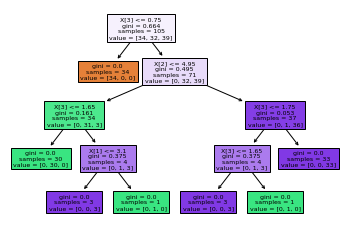

In [66]:
tree.plot_tree(clf, filled=True)

Alternativement, il est possible de faire un export en produisant un fichier `.dot` qui est le format par défaut de graphviz :

In [67]:
# On exporte le graphe dans le fichier iris.dot
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, filled=True)

Ensuite, en ligne de commande, il est possible de convertir ce fichier dans de nombreux formats, par exemple en PDF (commande shell) :

In [68]:
%%bash
dot -Tpdf iris.dot -o iris.pdf

L’image générée doit ressembler à ceci :

> <img src="https://scikit-learn.org/stable/_images/iris.png" style="width:100%;">


Une fois le modèle construit, il est possible de l’utiliser pour la prédiction sur de nouvelles données :

In [69]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

On peut de cette façon calculer le score en test :

In [70]:
clf.score(X_test, y_test)

0.9777777777777777

## Question :

Changez les valeurs de parametres `max_depth` et `min_samples_leaf`. Que constatez-vous ?

0.9111111111111111

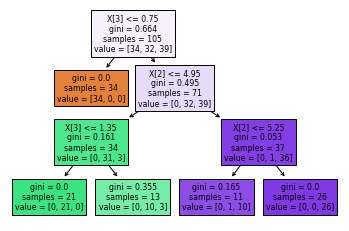

In [64]:
clf = tree.DecisionTreeClassifier(max_depth=8,min_samples_leaf=10)
clf.fit(X_train, y_train)
tree.plot_tree(clf, filled=True)
clf.predict(X_test)
clf.score(X_test, y_test)

## Question :

Le problème ici étant particulièrement simple, refaites une division apprentissage/test avec 10% des données en apprentissage et 90% test.

Calculez le taux d’éléments mal classifiés sur l’ensemble de test.

Faites varier (ou mieux, réalisez une recherche par grille avec `GridSearchCV`) les valeurs des paramètres `max_depth` et `min_samples_leaf` pour mesurer leur impact sur ce score.

(15, 4)
Best estimator found by grid search:
DecisionTreeClassifier(max_depth=10)
[[45  0  0]
 [ 0 42  2]
 [ 0  6 40]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.9407407407407408

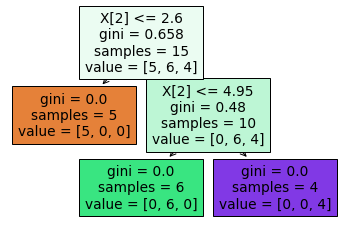

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

n_classes = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=0)
print(X_train.shape)
clf = tree.DecisionTreeClassifier()
parameters = {'max_depth':[1, 10], 'min_samples_leaf':[1, 20]}
clf = GridSearchCV(clf, parameters)
clf.fit(X_train, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))
sorted(clf.cv_results_.keys())

tree.plot_tree(clf.best_estimator_, filled=True)
clf.predict(X_test)
clf.score(X_test, y_test)

### Affichage de la surface de décision

Pour une paire d’attributs, c’est-à-dire pour des observations en deux dimensions, nous pouvons visualiser la surface de décision en 2 dimensions. D’abord on discrétise le domaine bidimensionnel avec un pas constant et ensuite on évalue le modèle sur chaque point de la grille.

Dans cet exemple, nous ne gardons que la longueur et la largeur des pétales.

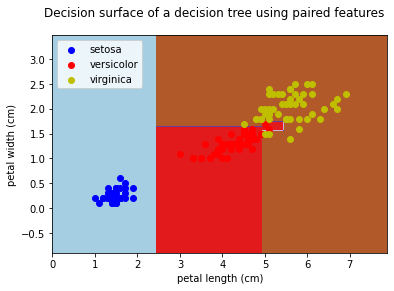

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02

# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]

# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target

# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)

# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")

# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

### Question :

Refaire l’affichage pour les autres paires d’attributs. Sur quelle paire la séparation entre les classes est la plus marquée ?

## Arbres de décision pour la régression

Pour la régression avec les arbres de décision, scikit-learn offre la classe `DecisionTreeRegressor`. Comme pour la classification, la méthode `fit(...)` prend en entrée le paramètre X (attributs des observations). Attention : les `y` ne sont pas des étiquettes de classes mais des valeurs réelles.

In [85]:
from sklearn import tree

X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

Dans l’exemple suivant nous allons construire un signal sinusoïdal affecté par un bruit blanc et nous allons apprendre un arbre de régression sur ces données d’apprentissage.

Text(0.5, 1.0, 'Signal sinusoïdal bruité')

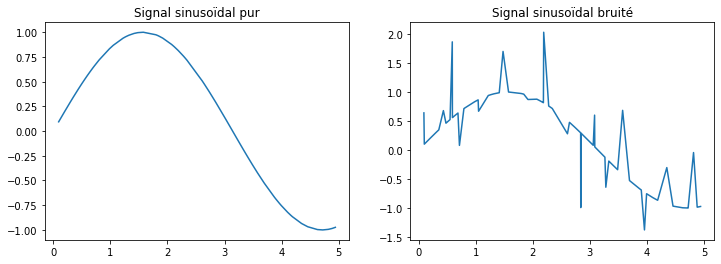

In [105]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# Créer les données d'apprentissage
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")

# On ajoute un bruit aléatoire tous les 5 échantillons
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")

L’objectif est de régresser ce signal `y` à partir des valeurs de `x`. Pour cela, nous utilisons un arbre de régression.

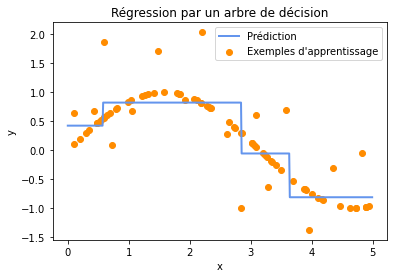

In [106]:
# Apprendre le modèle
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

## Question :

Changer la valeur du parametre `max_depth`. Que se passe-t-il si on prend une valeur trop grande ? Trop petite ? Changer le taux d’éléménts affectés par le bruit (le `y[::5]`). Quand tous les éléments sont affectés par le bruit, faut-il préférer une valeur élevée ou faible pour `max_depth` ?

(80, 1)
[0.31798318 0.41426299 0.0641475  0.69247212 0.56660145 0.26538949
 0.52324805 0.09394051 0.5759465  0.9292962  0.31856895 0.66741038
 0.13179786 0.7163272  0.28940609 0.18319136]


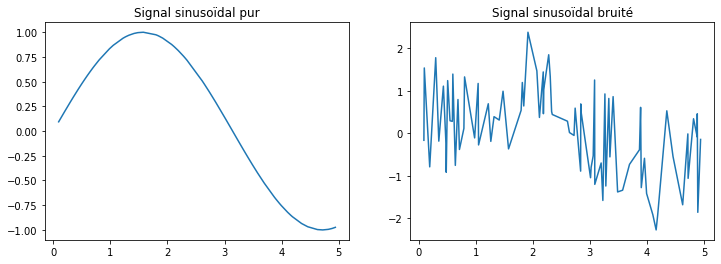

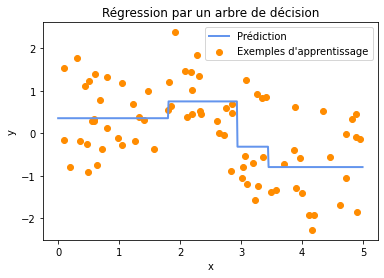

In [107]:
# Créer les données d'apprentissage
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

print(X.shape)

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")

print(np.random.rand(16))

# On ajoute un bruit aléatoire tous les 5 échantillons
y[::1] += 3 * (0.5 - np.random.rand(80))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")

# Apprendre le modèle
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)

# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)

# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

## Question :

Pour approfondir, chargez la base de données Diabetes du module `sklearn.datasets` et faire une  partition aléatoire en partie apprentissage et partie test (70% apprentissage, 30% test). Construire un modèle d’arbre de regression sur cette base. Calculer l’erreur quadratique moyenne sur l’ensemble de test. Faire un *grid search* pour trouver la valeur du paramètre `max_depth` qui minimize cette erreur.

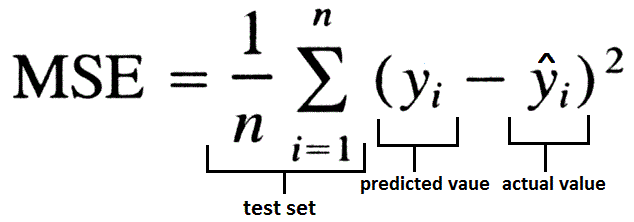

In [117]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()
X, y = diab.data, diab.target

print(X.shape)
print(y.shape)
print(y[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
print(X_train.shape)
reg = DecisionTreeRegressor()
parameters = {'max_depth':[1, 10]}
reg = GridSearchCV(reg, parameters)
reg.fit(X_train, y_train)
print("Best estimator found by grid search:")
print(reg.best_estimator_)

y_pred = reg.predict(X_test)

MSE = np.mean((y_test - y_pred)**2)
print("MSE = ", MSE)

(442, 10)
(442,)
151.0
(309, 10)
Best estimator found by grid search:
DecisionTreeRegressor(max_depth=1)
MSE =  4433.693215835212
